In [1]:
# ======================================
# Data Overview and Data Types
# ======================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------------------------
# Load raw dataset
# --------------------------------------

df = pd.read_csv("../data/processed/churn_cleaned.csv")

# --------------------------------------
# Initial inspection
# --------------------------------------

df.head()
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   RowNumber             9994 non-null   int64
 1   CustomerId            9994 non-null   int64
 2   Surname               9908 non-null   str  
 3   CreditScore           9994 non-null   int64
 4   Geography             9994 non-null   str  
 5   Gender                9994 non-null   str  
 6   Sex                   9994 non-null   int64
 7   Age                   9994 non-null   int64
 8   CurrentWorkingStatus  9994 non-null   int64
 9   Tenure                9994 non-null   int64
 10  Balance               9994 non-null   int64
 11  NumOfProducts         9994 non-null   int64
 12  ComplaintsLodged      9994 non-null   int64
 13  HasCrCard             9994 non-null   int64
 14  IsActiveMember        9994 non-null   int64
 15  EstimatedSalary       9994 non-null   int64
 16  Exited           

In [2]:
# --------------------------------------
# One-Hoot Encoding
# --------------------------------------

# One-Hoot Encoding
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=False)
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore  Sex  Age  \
0          1    15634602  Hargrave          619    1   42   
1          2    15647311      Hill          608    1   41   
2          3    15619304      Onio          502    1   42   
3          4    15701354      Boni          699    1   39   
4          5    15737888  Mitchell          850    1   43   

   CurrentWorkingStatus  Tenure  Balance  NumOfProducts  ComplaintsLodged  \
0                     1       2        0              1                 1   
1                     1       1    83807              1                 0   
2                     1       8   159660              3                 1   
3                     1       1        0              2                 0   
4                     1       2   125510              1                 0   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0          1               1           101348       1              True   
1          0        

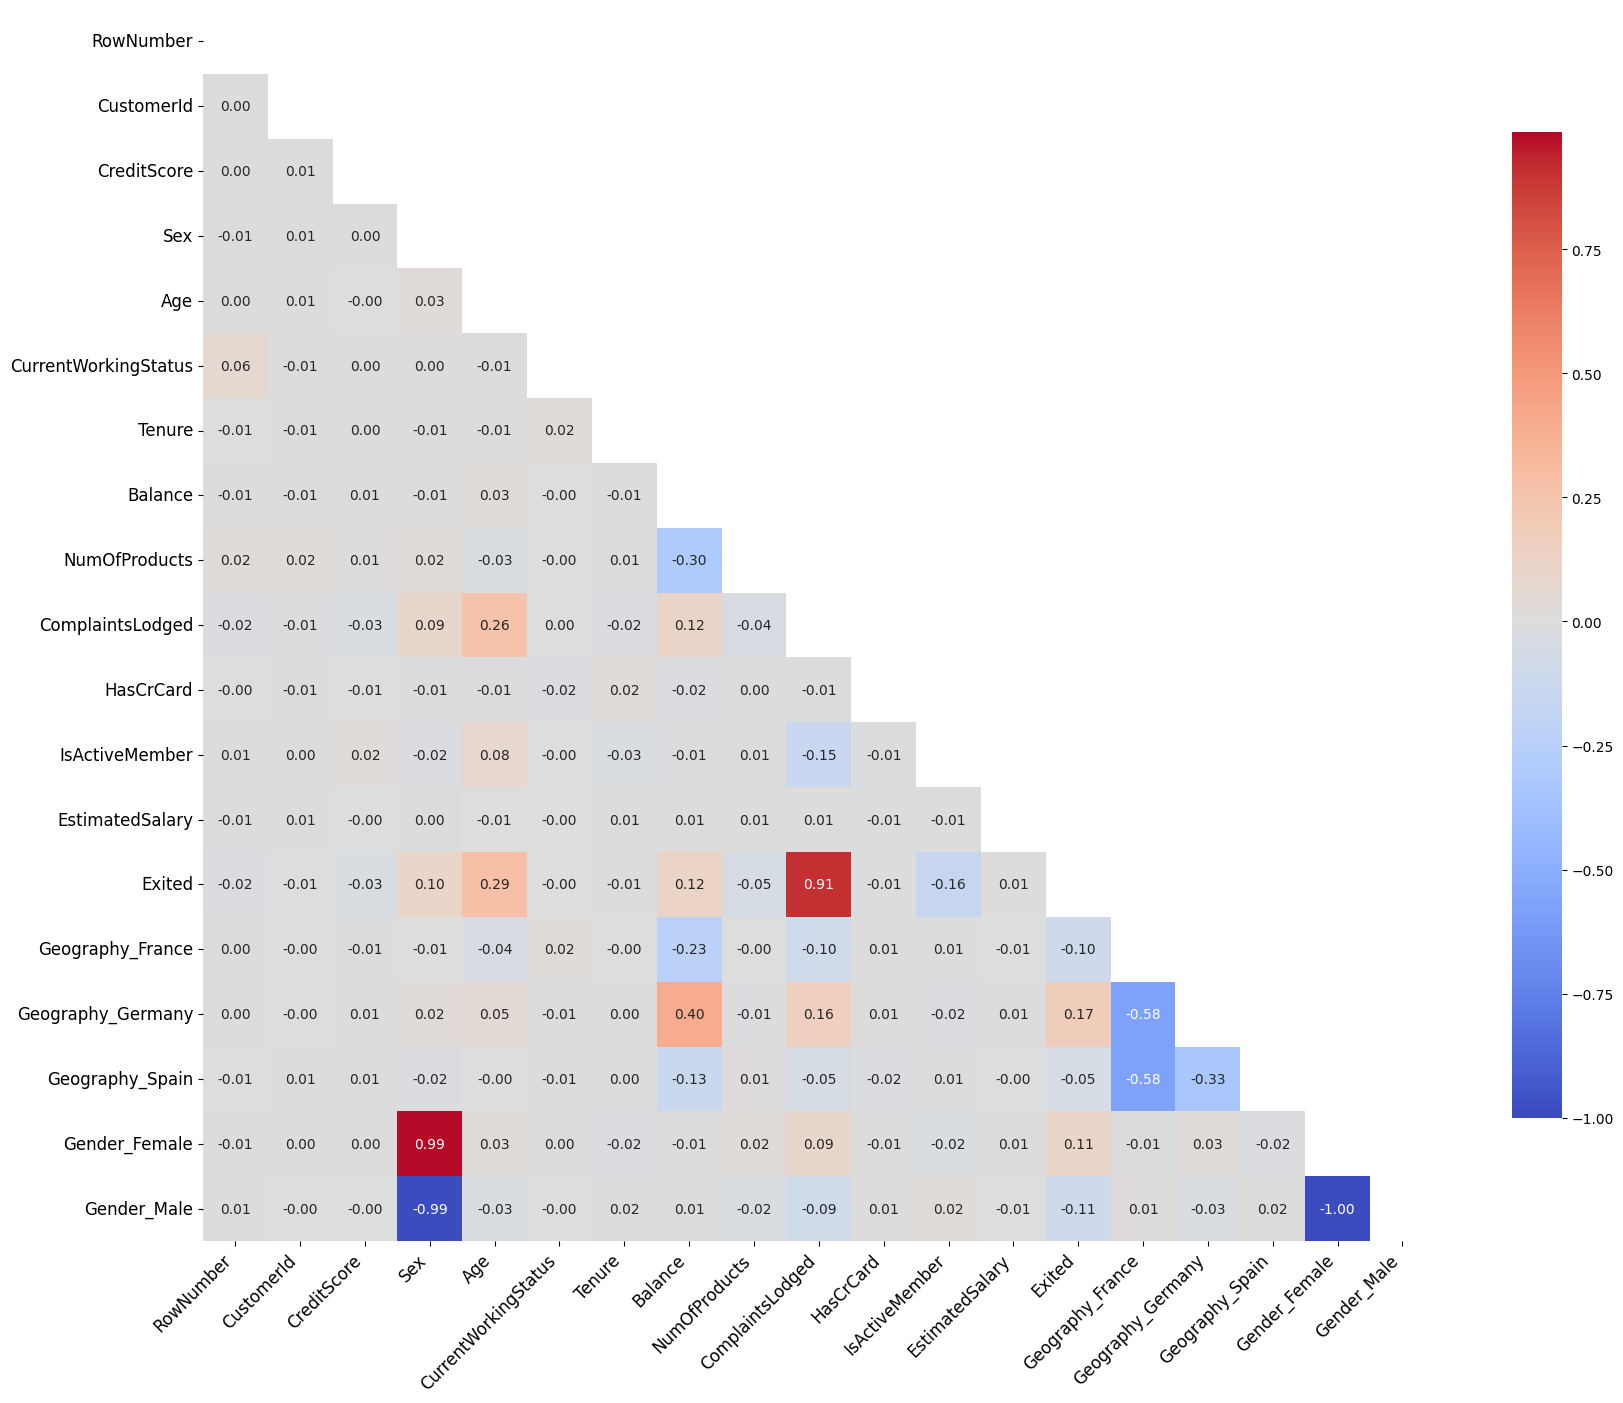

In [3]:
# --------------------------------------
# Numerical correlation (Pearson)
# --------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

correlation_mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(20, 16))  
sns.heatmap(correlation_matrix, 
            annot=True, fmt=".2f",
            annot_kws={'size': 10},  
            cmap='coolwarm', center=0, 
            mask=correlation_mask, square=True,
            cbar_kws={'shrink': 0.8})  
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(rotation=0, fontsize=12)               
plt.show()